## 1) Import the libraries

In [1]:
# data analysis libraries
import numpy as np
import pandas as pd

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

## 2) Explore the dataset

In [2]:
# Movies dataframe
movies_df = pd.read_csv("dataset\movies.dat", sep = '::', engine = 'python', encoding='iso-8859-1')   
movies_df.columns = ['MovieIDs', 'MovieName', 'Category']
movies_df.dropna(inplace = True)
movies_df.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [3]:
# description of statistical analysis
movies_df.describe(include = 'all')

,MovieIDs,MovieName,Category
count,3882.000000,3882,3882
unique,NaN,3882,301
top,NaN,Jumanji (1995),Drama
freq,NaN,1,843
mean,1986.560793,NaN,NaN
std,1146.483260,NaN,NaN
min,2.000000,NaN,NaN
25%,983.250000,NaN,NaN
50%,2010.500000,NaN,NaN
75%,2980.750000,NaN,NaN


In [4]:
# Summary of the dataframe
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3882 entries, 0 to 3881
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MovieIDs   3882 non-null   int64 
 1   MovieName  3882 non-null   object
 2   Category   3882 non-null   object
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [5]:
# Ratings dataframe
ratings_df = pd.read_csv("dataset/ratings.dat", sep='::', engine='python')
ratings_df.columns =['ID','MovieID','Ratings','TimeStamp']
ratings_df.dropna(inplace=True)
ratings_df.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [6]:
# description of statistical analysis
ratings_df.describe(include='all')

,ID,MovieID,Ratings,TimeStamp
count,1.000208e+06,1.000208e+06,1.000208e+06,1.000208e+06
mean,3.024515e+03,1.865541e+03,3.581563e+00,9.722437e+08
std,1.728411e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [7]:
# Summary of the dataframe
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000208 entries, 0 to 1000207
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   ID         1000208 non-null  int64
 1   MovieID    1000208 non-null  int64
 2   Ratings    1000208 non-null  int64
 3   TimeStamp  1000208 non-null  int64
dtypes: int64(4)
memory usage: 38.2 MB


In [8]:
# Users dataframe
users_df = pd.read_csv("dataset/users.dat", sep = '::', engine = 'python')
users_df.columns =['UserID','Gender','Age','Occupation','Zip-code']
users_df.dropna(inplace=True)
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [9]:
# description of statistical analysis
users_df.describe(include = 'all')

,UserID,Gender,Age,Occupation,Zip-code
count,6039.000000,6039,6039.000000,6039.000000,6039
unique,NaN,2,NaN,NaN,3439
top,NaN,M,NaN,NaN,48104
freq,NaN,4331,NaN,NaN,19
mean,3021.000000,NaN,30.644146,8.146547,NaN
std,1743.453469,NaN,12.891387,6.329991,NaN
min,2.000000,NaN,1.000000,0.000000,NaN
25%,1511.500000,NaN,25.000000,3.000000,NaN
50%,3021.000000,NaN,25.000000,7.000000,NaN
75%,4530.500000,NaN,35.000000,14.000000,NaN


In [10]:
# Summary of the dataframe
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6039 entries, 0 to 6038
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6039 non-null   int64 
 1   Gender      6039 non-null   object
 2   Age         6039 non-null   int64 
 3   Occupation  6039 non-null   int64 
 4   Zip-code    6039 non-null   object
dtypes: int64(3), object(2)
memory usage: 283.1+ KB


In [11]:
# Concatenation of different dataframes into a dataframe which is used further in the project
df = pd.concat([movies_df, ratings_df, users_df], axis = 1)        # final dataframe
df.head(10)

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117
5,7.0,Sabrina (1995),Comedy|Romance,1,1287,5,978302039,7.0,M,35.0,1.0,06810
6,8.0,Tom and Huck (1995),Adventure|Children's,1,2804,5,978300719,8.0,M,25.0,12.0,11413
7,9.0,Sudden Death (1995),Action,1,594,4,978302268,9.0,M,25.0,17.0,61614
8,10.0,GoldenEye (1995),Action|Adventure|Thriller,1,919,4,978301368,10.0,F,35.0,1.0,95370
9,11.0,"American President, The (1995)",Comedy|Drama|Romance,1,595,5,978824268,11.0,F,25.0,1.0,04093


## 3) Exploratory Data Analysis (EDA) performance

### Users dataset

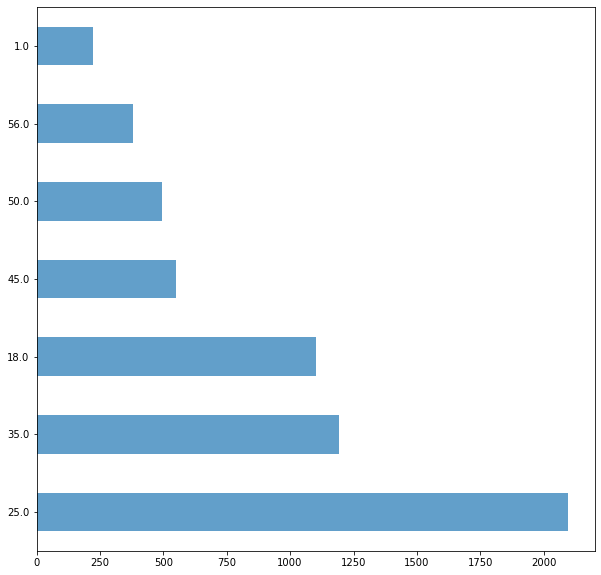

In [12]:
# Visualize user's age distribution
df['Age'].value_counts().plot(kind = 'barh', alpha = 0.7, figsize = (10,10))      # horizontal bar plot
plt.show()

Text(0, 0.5, 'Count of users')

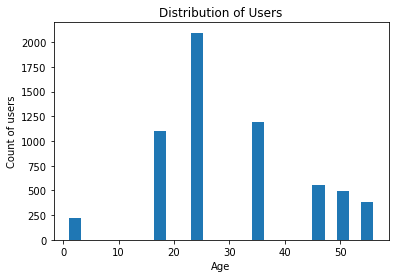

In [13]:
# Plot the histogram to see the distribution
df.Age.plot.hist(bins = 25)
plt.title("Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Count of users")

In [14]:
# Make Ages into a categorical feature (Age_group) and make a table for both of them to see the relation 
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['Age_group'] = pd.cut(df.Age, range(0, 81, 10), right = False, labels = labels)
df[['Age', 'Age_group']].drop_duplicates()[:10]

,Age,Age_group
0,56.0,50-59
1,25.0,20-29
2,45.0,40-49
4,50.0,50-59
5,35.0,30-39
16,18.0,10-19
17,1.0,0-9
6039,NaN,NaN


In [15]:
# Total number of users (M/F)
total_users = df['Gender'].value_counts()
total_users

M    4331
F    1708
Name: Gender, dtype: int64

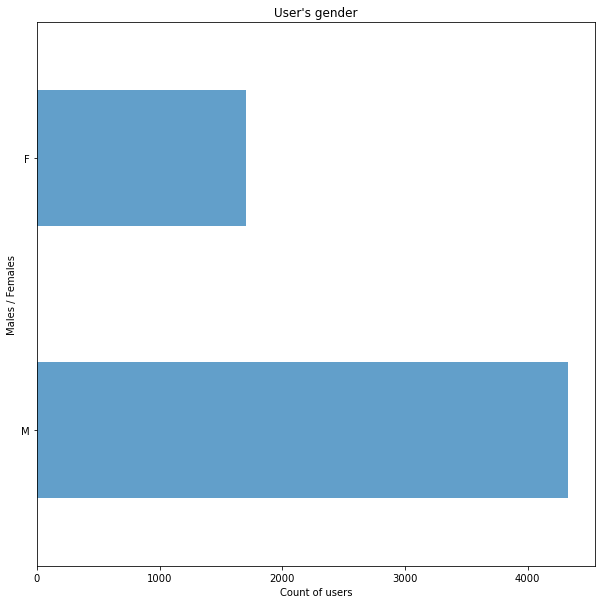

In [16]:
# Visualize user's gender distribution
users_df['Gender'].value_counts().plot(kind = 'barh', alpha = 0.7, figsize = (10,10))
plt.title("User's gender")
plt.xlabel("Count of users")
plt.ylabel("Males / Females")
plt.show()

### Ratings dataset

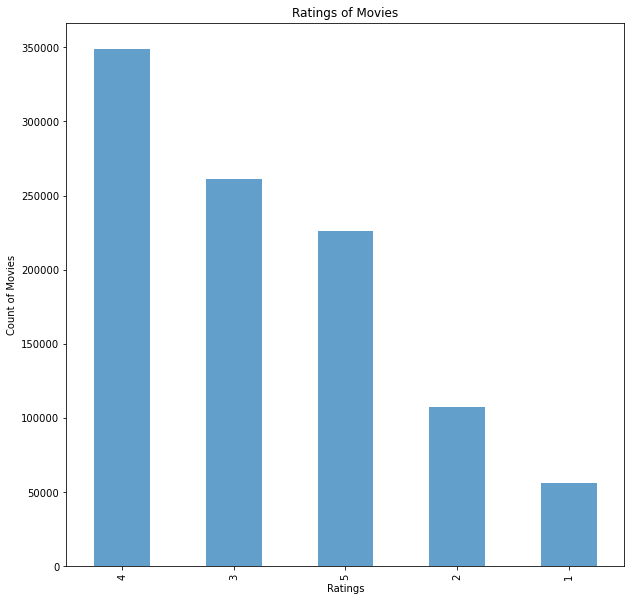

In [17]:
# Visualize Rating by users
df['Ratings'].value_counts().plot(kind = 'bar', alpha = 0.7, figsize = (10,10))
plt.xlabel("Ratings")
plt.ylabel("Count of Movies")
plt.title("Ratings of Movies")
plt.show()

In [18]:
# groupby is used for grouping data to apply functions easy, here make 3 different grouping objects 
groupedby_movieName = df.groupby('MovieName')
groupedby_rating = df.groupby('Ratings')
groupedby_uid = df.groupby('UserID')

### Movies dataset

In [19]:
# Total number of movies in our dataset
total_movies = df['Ratings'].value_counts().sum()
total_movies

1000208

In [20]:
# Sort the values of Moviename in ascencding order
movies = df.groupby('MovieName').size().sort_values(ascending = True)[:1000]
movies

MovieName
$1,000,000 Duck (1971)                   1
Only Angels Have Wings (1939)            1
Only You (1994)                          1
Open Season (1996)                       1
Open Your Eyes (Abre los ojos) (1997)    1
                                        ..
Toy Story 2 (1999)                       1
Toys (1992)                              1
Total Eclipse (1995)                     1
Trading Places (1983)                    1
Tom & Viv (1994)                         1
Length: 1000, dtype: int64

In [21]:
# Get the Movie (Total Eclipse (1995)) and its shape 
Road_to_Morocco_data = groupedby_movieName.get_group('Total Eclipse (1995)')
Road_to_Morocco_data.shape

(1, 13)

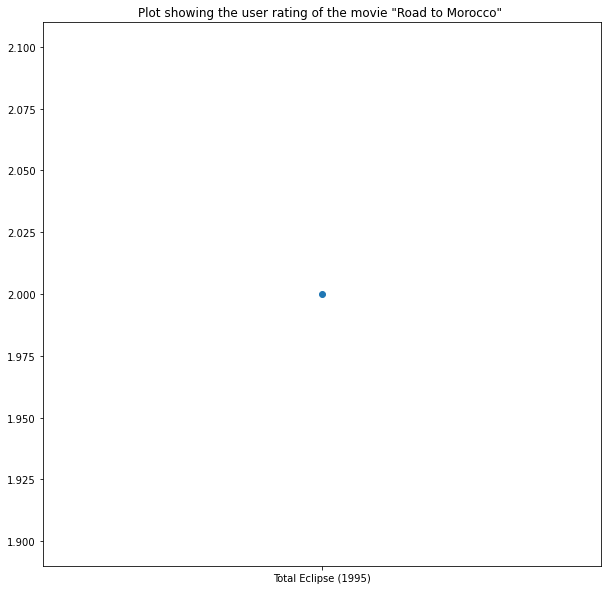

In [22]:
# Visualize the movie and its user ratings 
plt.figure(figsize=(10,10))
plt.scatter(Road_to_Morocco_data['MovieName'], Road_to_Morocco_data['Ratings'])
plt.title('Plot showing the user rating of the movie "Road to Morocco" ')
plt.show()

In [23]:
# Find and visualize the viewership of the movie “Road to Morocco (1942)” by age group
Road_to_Morocco_data[['MovieName', 'Age_group']]

,MovieName,Age_group
199,Total Eclipse (1995),30-39


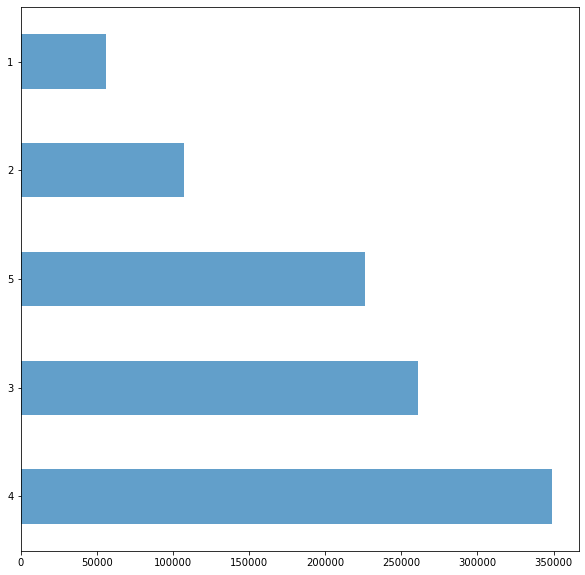

In [24]:
# Find and visualize the top 25 movies by viewership ratings
top_25 = df[25:]
top_25['Ratings'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,10))
plt.show()

In [25]:
# Visualaize the specific user id 3000 with its ratings
userid_3000 = groupedby_uid.get_group(3000)
userid_3000[['UserID', 'Ratings']]

,UserID,Ratings
2998,3000.0,2


In [26]:
# Visualaize the specific user id 3000 with its ratings
userid_2696 = groupedby_uid.get_group(2696)
userid_2696[['UserID', 'Ratings']]

,UserID,Ratings
2694,2696.0,3


## 4) Machine Learning performance on first 1000 extracted records

In [27]:
# Extract first 1000 records
first_1000 = df.iloc[:1000]
first_1000.dropna()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code,Age_group
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072,50-59
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117,20-29
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460,40-49
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455,20-29
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1009.0,Escape to Witch Mountain (1975),Adventure|Children's|Fantasy,10,1020,3,978228726,997.0,M,1.0,19.0,15748,0-9
996,1010.0,"Love Bug, The (1969)",Children's|Comedy,10,784,3,978230946,998.0,M,45.0,20.0,10019,40-49
997,1011.0,Herbie Rides Again (1974),Adventure|Children's|Comedy,10,858,3,978224375,999.0,M,25.0,15.0,62558,20-29
998,1012.0,Old Yeller (1957),Children's|Drama,10,1022,5,979775689,1000.0,F,25.0,6.0,90027,20-29


In [28]:
# Feature engineering on Gender feature
Gender_map = {'M': 1, 'F': 0}
first_1000_copy = first_1000.copy() # Make a copy of dataframe and to apply function on it rather than original data 
first_1000_copy.loc[:, 'Gender'] = first_1000['Gender'].replace(Gender_map) # Original data remains safe
first_1000_copy.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code,Age_group
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1,56.0,16.0,70072,50-59
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1,25.0,15.0,55117,20-29
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1,45.0,7.0,02460,40-49
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1,25.0,20.0,55455,20-29
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,0,50.0,9.0,55117,50-59


In [29]:
# Use movie_id, age, occupation as features 
# features are used for the predictions (X = features)
features = first_1000_copy[['MovieID', 'Gender', 'Age', 'Occupation']].values  

In [30]:
# Use ratings as labels
labels = first_1000_copy['Ratings'].values      # labels are the prediction   (y = labels)

In [31]:
# Split the dataframe into train and test 
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 42)

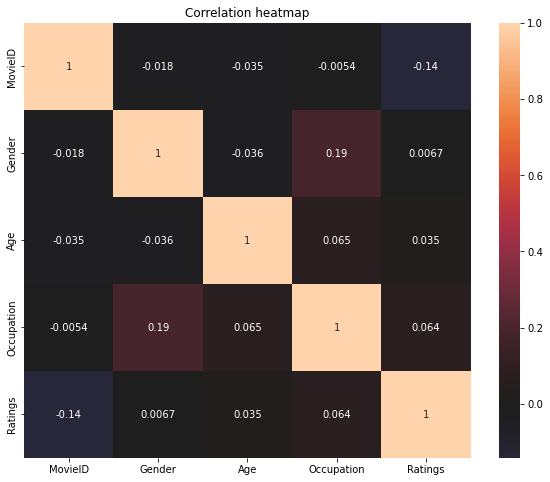

In [32]:
# Visualize heatmap and correlation matrix
features = first_1000_copy[['MovieID', 'Gender', 'Age', 'Occupation', 'Ratings']]
correlation_matrix = features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, center = 0)
plt.title('Correlation heatmap')
plt.show()

Text(0.5, 0, 'Gender')

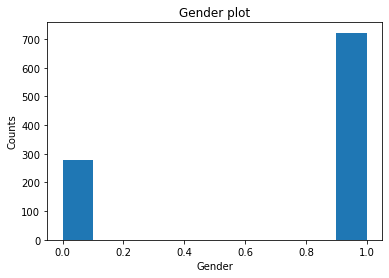

In [33]:
# Create a histogram for gender
first_1000_copy.Gender.plot.hist()
plt.title("Gender plot")
plt.ylabel('Counts')
plt.xlabel('Gender')

Text(0.5, 0, 'Age')

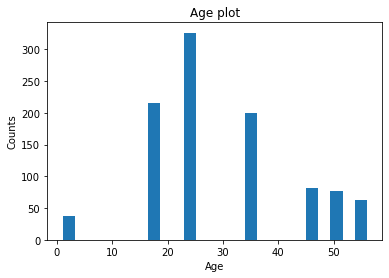

In [34]:
# Create a histogram for age
first_1000_copy.Age.plot.hist(bins=25)
plt.title("Age plot")
plt.ylabel('Counts')
plt.xlabel('Age')

Text(0.5, 0, 'Occupation')

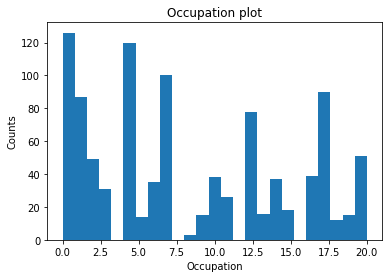

In [35]:
# Create a histogram for occupation
first_1000_copy.Occupation.plot.hist(bins=25)
plt.title("Occupation plot")
plt.ylabel('Counts')
plt.xlabel('Occupation')

Text(0.5, 0, 'MovieID')

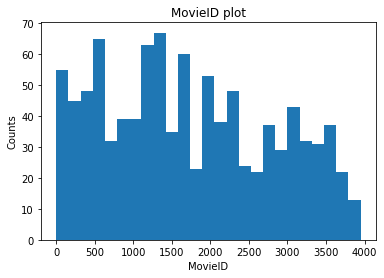

In [36]:
# Create a histogram for occupation
first_1000_copy.MovieID.plot.hist(bins=25)
plt.title("MovieID plot")
plt.ylabel('Counts')
plt.xlabel('MovieID')

In [37]:
# Support Vector Machines (SVM)

svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
print(acc_svc)
#acc_svc_pred = round(accuracy_score(Y_pred, test_labels) * 100, 2)
#print(acc_svc_pred)

36.14


In [38]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
print(acc_decision_tree)
#acc_decision_tree_pred = round(accuracy_score(Y_pred, test_labels) * 100, 2)
#print(acc_decision_tree_pred)

99.86


In [39]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 500)
knn.fit(train, train_labels)
y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
print(acc_knn)
#acc_knn = round(accuracy_score(Y_pred, test_labels) * 100, 2)
#print(acc_knn_pred)

36.14


In [40]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
print(acc_random_forest)
# acc_random_forest_pred = round(accuracy_score(Y_pred, test_labels) * 100, 2)
# print(acc_random_forest_pred)


99.86


In [41]:
# Logistic Regression

logreg = LogisticRegression(max_iter = 20000)
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log
# acc_log_pred = round(accuracy_score(Y_pred, test_labels) * 100, 2)
# print(acc_log_pred)

36.29

In [42]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 
              'Random Forest', 'Decision Tree', 'Logistic Regression'],
    'Score': [acc_svc, acc_knn, 
              acc_random_forest, acc_decision_tree, acc_log]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,99.86
3,Decision Tree,99.86
4,Logistic Regression,36.29
0,Support Vector Machines,36.14
1,KNN,36.14


In [43]:
# Random Forest and Decision Tree are the most accurate ML algorithm techniques to produce score of almost 99% on train 
# and train labels.